In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline  


# Lectura de Dataset

In [3]:
lista_attr = []
with open('dataset.txt', 'r') as dataset:
    for line in dataset:
        line.strip()
        initia = line.find('[')
        lista_list = [float(x) for x in line[initia + 1: -2].split(', ')]
        lista_attr.append(lista_list)


# PCA

In [4]:
X = np.array(lista_attr)
pca = PCA(n_components = 50)
X_new = pca.fit_transform(X) 

# KMeans

In [5]:
k1 = 10
k2 = 20
k3 = 30
klist = [k1,k2,k3]
labels = []
centroids = []
silavg = []
for k in klist :
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_new)
    cluster_labels = kmeans.labels_
    labels += [cluster_labels]
    centroids += [kmeans.cluster_centers_]
    silhouette_avg = silhouette_score(X_new, cluster_labels, metric='euclidean')
    print(silhouette_avg)
    print(metrics.calinski_harabaz_score(X_new, cluster_labels))
#Silhoutte Score 

0.0549480562516
193.162734076
0.0538213676265
127.033644097
0.0545950289969
97.7809916264


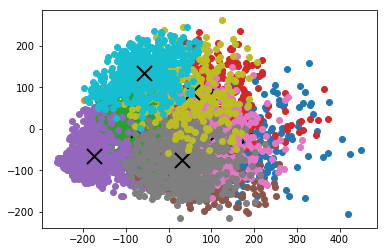

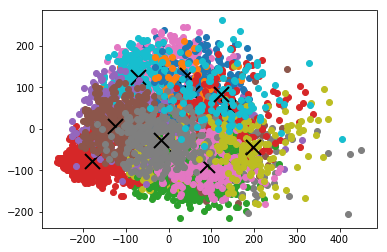

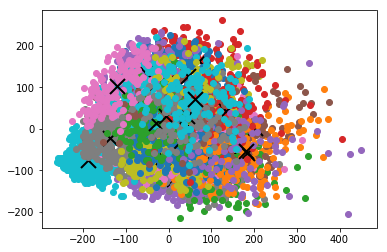

In [6]:
#Plot de cada K
n = 0
for k in klist :
    for i in range(k):
        ds = X_new[np.where(labels[n]==i)]
        plt.plot(ds[:,0],ds[:,1],'o')
        lines = plt.plot(centroids[n][i,0],centroids[n][i,1],'kx')
        plt.setp(lines,ms=15.0)
        plt.setp(lines,mew=2.0)
    n += 1
    plt.show()

# MeanShift

In [7]:
bandwidth = estimate_bandwidth(X_new)
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X_new)
labels_ms = ms.labels_
cluster_centers_ms = ms.cluster_centers_
n_clusters_ = labels_ms.max()+1
print(n_clusters_)

11


In [8]:
silhouette_avg = silhouette_score(X_new, labels_ms)
print(silhouette_avg)
print(metrics.calinski_harabaz_score(X_new, labels_ms))

0.214351915719
14.5382738393


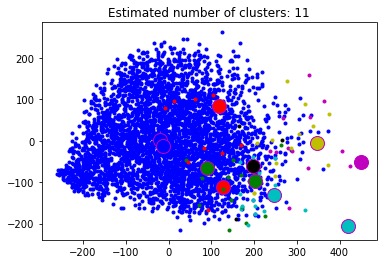

In [9]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for m, col in zip(range(n_clusters_), colors):
    my_members = labels_ms == m
    cluster_center = cluster_centers_ms[m]
    plt.plot(X_new[my_members, 0], X_new[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='m', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# DBSCAN

In [10]:
db0 = DBSCAN(eps = 100, min_samples = 4,n_jobs=-1).fit(X_new)
db1 = DBSCAN(eps = 240, min_samples = 2,n_jobs=-1).fit(X_new)
db2 = DBSCAN(eps = 240, min_samples = 3,n_jobs=-1).fit(X_new)

dblabels0 = db0.labels_
dblabels1 = db1.labels_
dblabels2 = db2.labels_

n_clusters_0 = len(set(dblabels0)) - (1 if -1 in dblabels0 else 0)
n_clusters_1 = len(set(dblabels1)) - (1 if -1 in dblabels1 else 0)
n_clusters_2 = len(set(dblabels2)) - (1 if -1 in dblabels2 else 0)

print('Estimated number of clusters: %d' % n_clusters_0)
print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of clusters: %d' % n_clusters_2)

Estimated number of clusters: 3
Estimated number of clusters: 43
Estimated number of clusters: 9


In [11]:
print(silhouette_score(X_new, dblabels0))
print(silhouette_score(X_new, dblabels1))
print(silhouette_score(X_new, dblabels2))

print(metrics.calinski_harabaz_score(X_new, dblabels0))
print(metrics.calinski_harabaz_score(X_new, dblabels1))
print(metrics.calinski_harabaz_score(X_new, dblabels2))

-0.114252117366
-0.0975272376786
-0.0194498009497
54.7261161577
8.96010377617
32.2592443438


In [12]:
X_backup = X_new

# T-SNE

In [13]:
modelo = TSNE(n_components = 2, perplexity = 50,early_exaggeration=25,n_iter=5000)
t_sne=modelo.fit_transform(X_backup)

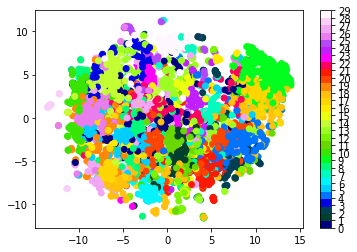

In [14]:
vis_x = t_sne[:, 0]
vis_y = t_sne[:, 1]

plt.scatter(vis_x, vis_y, c=labels[2], cmap=plt.cm.get_cmap("gist_ncar", 30))
plt.colorbar(ticks=range(30))
plt.show()
#50-15-5000

# CSV

In [15]:
ids = []
path = []
thumbs_path = []
with open('dataset.txt', 'r') as dataset:
    for line in dataset:
        id_start = line.find('/', 3)
        id_end = line.find('.', 3)
        actual_id = line[id_start+1:id_end]
        ids.append(int(actual_id))
        path.append('byArtworkID/' + str(line[id_start+1:id_end]) + '.jpg')
        thumbs_path.append('byArtworkID/thumbs/' + str(line[id_start+1:id_end]) + '.jpg')
        
x = []
y = []
clases = []
t_sne_scaled = MinMaxScaler(feature_range=(0,1)).fit_transform(t_sne)
for t in t_sne_scaled:
    x.append(t[0])
    y.append(t[1])

for clase in labels[0]:
    clase = str(clase)
    clases.append('Clase ' + clase)


DataSet = list(zip(ids, x, y,clases,path,thumbs_path))
df = pd.DataFrame(data = DataSet, columns=['id', 'x', 'y','class','file','thumbnail'])
df
df.to_csv('data.csv',index=False,header=True)

# LAPJV
Lo siguiente requiere libreria lapjv que tiene unos bugs. Tuve problemas no solo en instalarlo en windows, sino también al ejecutarlo. Se usó maquina virtual de ubuntu para ejecutar esta parte. También se encontró problemas al instalar esto en Linux, por lo que se tuvo que actualizar libgcc que trae Anacaconda. Ante todo esto, el resultado final es bueno.

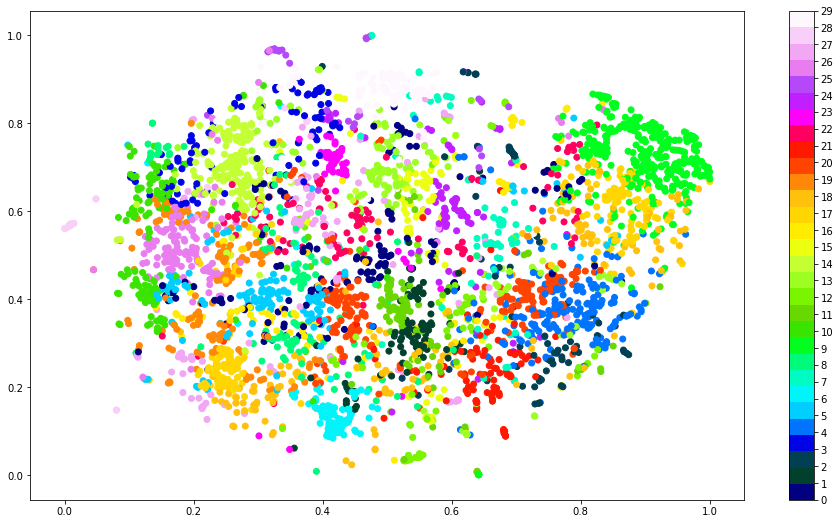

In [59]:
from sklearn.utils import shuffle
size=64
N = size * size
#t_sned, clusteres = shuffle(t_sne_scaled, labels[2], n_samples=N)
t_sned = t_sne_scaled[:4096]
clusteres = labels[2][:4096]
plt.scatter(t_sned[:, 0],t_sned[:, 1] , c=clusteres, cmap=plt.cm.get_cmap("gist_ncar", 30))
plt.colorbar(ticks=range(30))
plt.show()

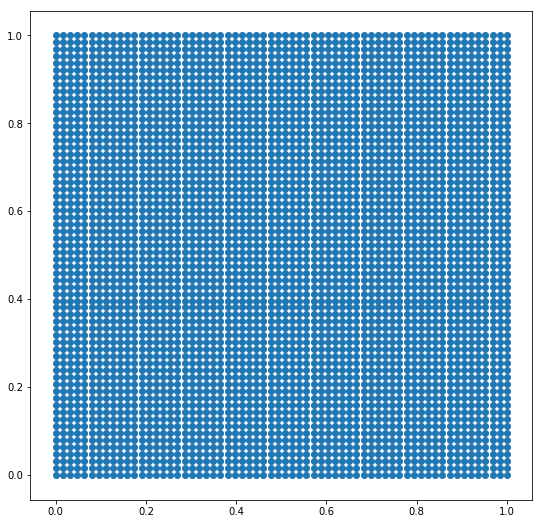

In [60]:
from scipy.spatial.distance import cdist
grid = np.dstack(np.meshgrid(np.linspace(0, 1, size), np.linspace(0, 1, size))).reshape(-1, 2)
plt.rcParams["figure.figsize"] = (9, 9)
plt.scatter(grid[:,0], grid[:, 1])


In [18]:
from lapjv import lapjv

In [61]:
cost_matrix = cdist(grid, t_sned, "sqeuclidean").astype(np.float64)
cost_matrix = cost_matrix * (100000 / cost_matrix.max())
# print(cost_matrix)
# plt.scatter(cost_matrix[:,0], cost_matrix[:,1])
row_asses, col_asses, _ = lapjv(cost_matrix)

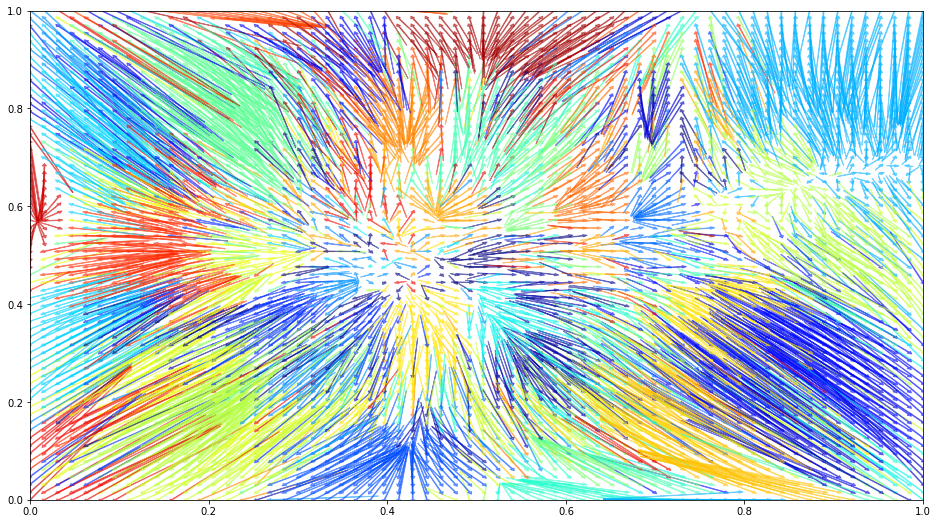

In [62]:
grid_jv = grid[col_asses]
pp_cmap = cm.get_cmap(name='jet')
plt.rcParams["figure.figsize"] = (16, 9)

for start, end, t in zip(t_sned, grid_jv, clusteres):
    plt.arrow(start[0], start[1], end[0] - start[0], end[1] - start[1],
          head_length=0.005, head_width=0.005, color=pp_cmap(t / 30), alpha=0.5)


### Solo ejecutar cuando quiere el csv para lapjv.

In [64]:
ids = []
path = []
thumbs_path = []
with open('dataset.txt', 'r') as dataset:
    for line in dataset:
        id_start = line.find('/', 3)
        id_end = line.find('.', 3)
        actual_id = line[id_start+1:id_end]
        ids.append(int(actual_id))
        path.append('byArtworkID/' + str(line[id_start+1:id_end]) + '.jpg')
        thumbs_path.append('byArtworkID/thumbs/' + str(line[id_start+1:id_end]) + '.jpg')
        
x = []
y = []
clases = []


for t in grid_jv:
    x.append(t[0])
    y.append(t[1])

for clase in labels[2]:
    clase = str(clase)
    clases.append('Clase ' + clase)


DataSet = list(zip(ids[:4096], x, y, clases[:4096], path[:4096] ,thumbs_path[:4096]))
df = pd.DataFrame(data = DataSet, columns=['id', 'x', 'y','class','file','thumbnail'])
df
df.to_csv('data.csv',index=False,header=True)